In [3]:
# Import pandas, numpy, and matplotlip
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#seaborn is a data visualization library built on matplotlib
import seaborn as sns
#set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm


# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm


In [4]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/jngakwa/education/refs/heads/main/code/education_clean.csv'
)

In [5]:
df.head()

,id,rate_unemployment,percent_college,percent_married,median_income,average_act,percent_lunch,year,state,zip_code,school_type,school_level,charter
0,100001600143,0.117962,0.445283,0.346495,42820.0,20.433455,0.066901,2016-2017,DE,19804,Regular School,High,Yes
1,100008000024,0.063984,0.662765,0.767619,89320.0,19.498168,0.112412,2016-2017,DE,19709,Regular School,High,No
2,100008000225,0.056460,0.701864,0.713090,84140.0,19.554335,0.096816,2016-2017,DE,19709,Regular School,High,No
3,100017000029,0.044739,0.692062,0.641283,56500.0,17.737485,0.296960,2016-2017,DE,19958,Regular School,High,No
4,100018000040,0.077014,0.640060,0.834402,54015.0,18.245421,0.262641,2016-2017,DE,19934,Regular School,High,No


### Exploratory data analysis

#### Examine distributions and relationships

Plot the correlation matrix of the numerical variable in the training data to explore relationships between the variables.

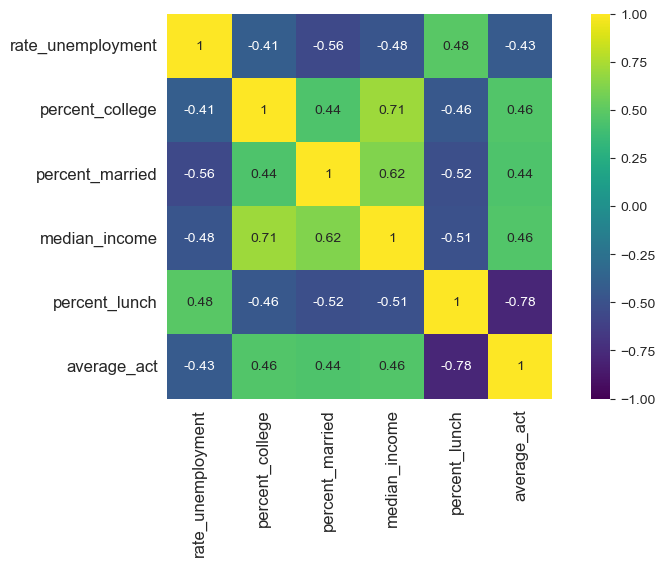

In [6]:
predictor_variables = ['rate_unemployment','percent_college','percent_married','median_income','percent_lunch','state','charter']
numerical_prerdictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()
corr_matrix = df[numerical_prerdictors + ["average_act"]].corr()
plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)
plt.show()

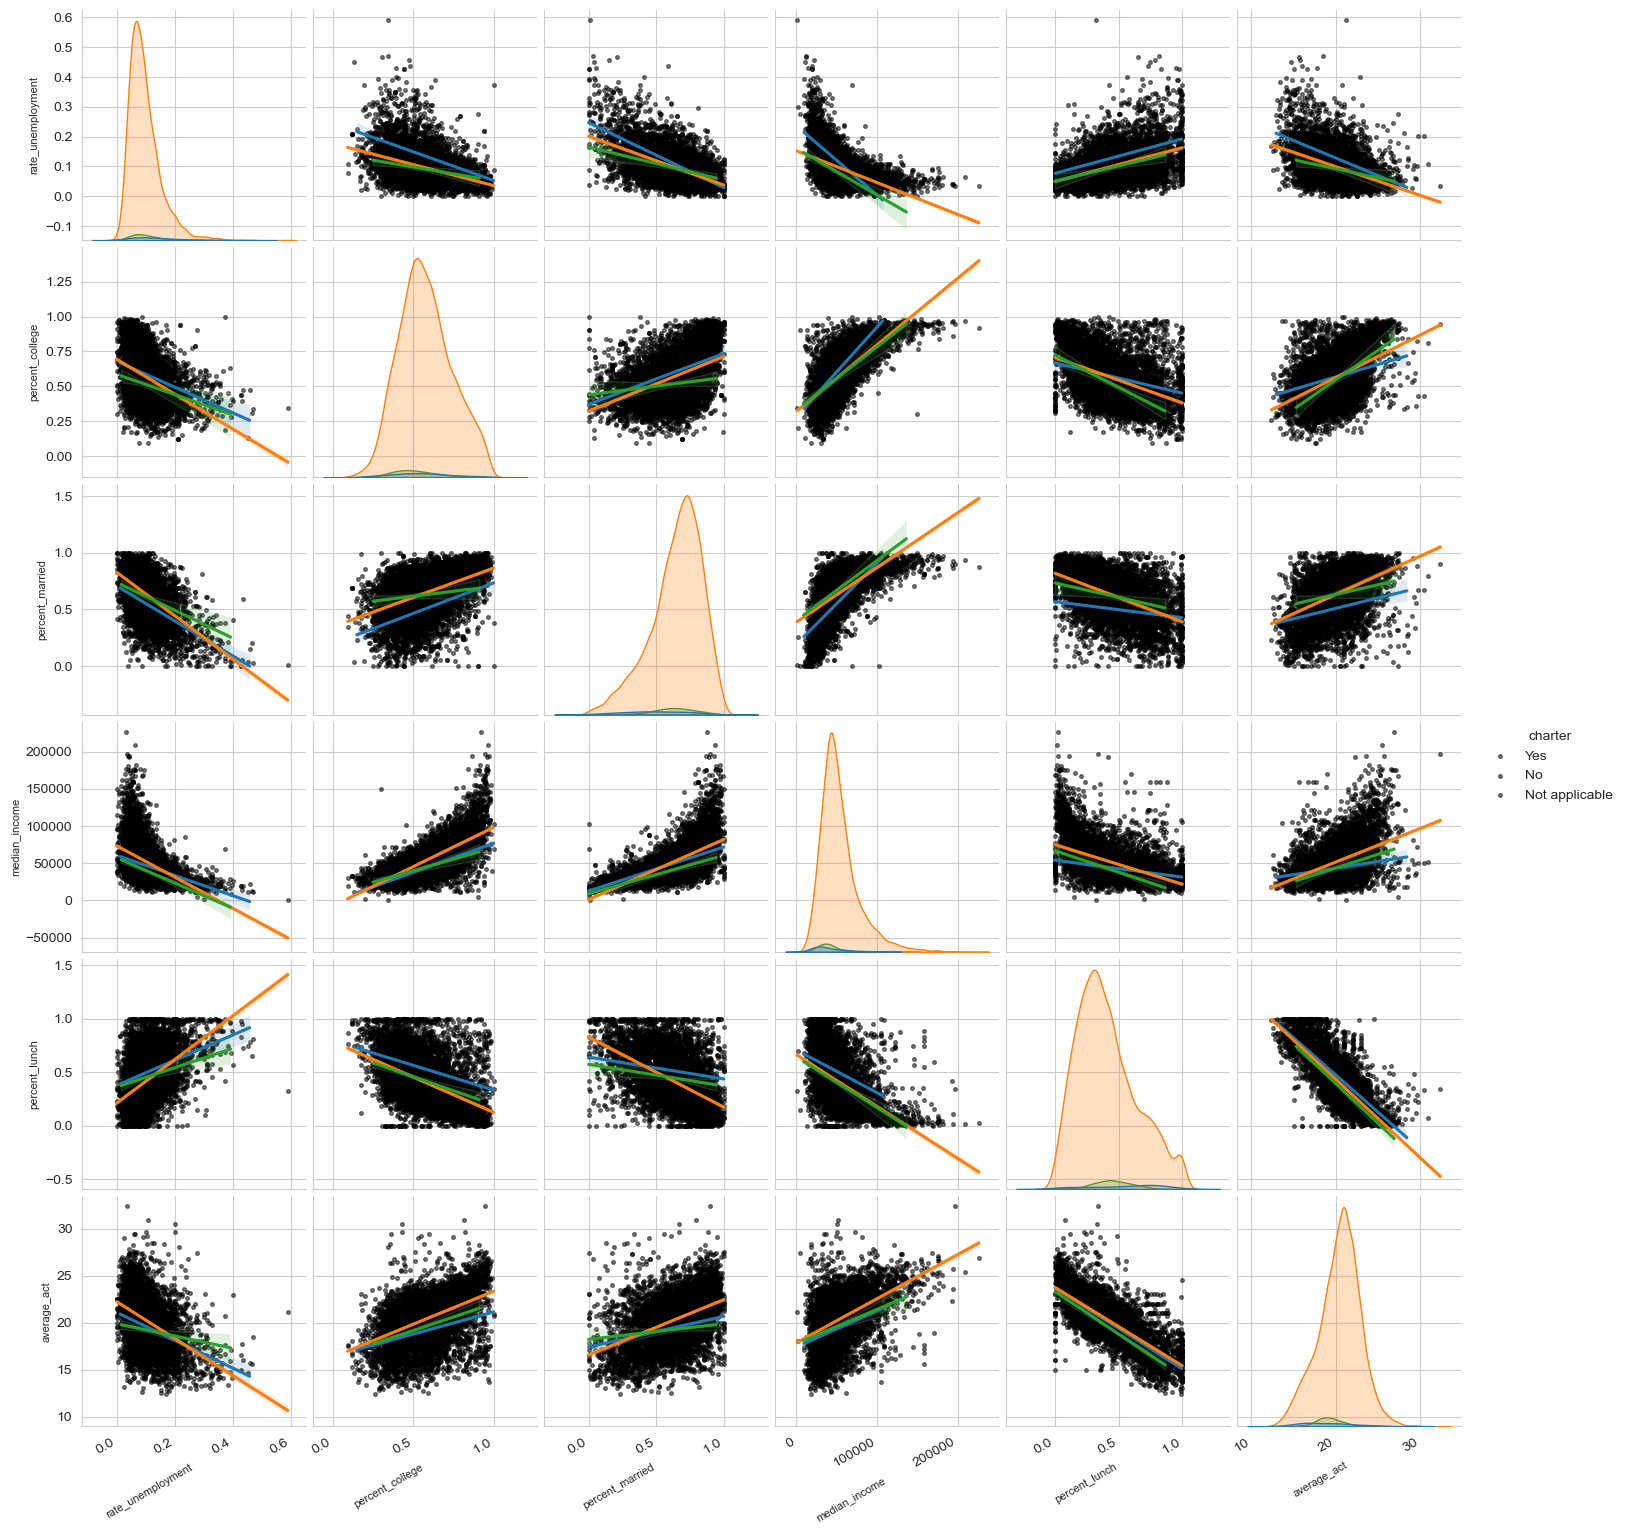

In [8]:
fig = sns.pairplot(
    data=df,
    vars=numerical_prerdictors + ["average_act"],
    hue='charter',
    kind="reg",
plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
         },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household income':
        ax.ticklabel_format(style='sci', axis='x',scilimits=(0,0)) #Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right') # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8) # Y-axis label size

    # Rotate x-axis tixk labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

#### Identify outliers

We can use the interquartile range to identify outliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we will make two plots to explore the data.

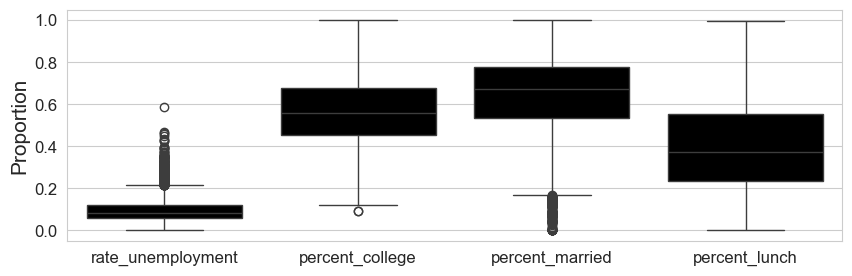

In [11]:
plt.figure(figsize=(10,3))

fractions = list(numerical_prerdictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

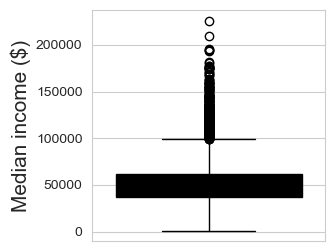

In [12]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)', fontsize=15)

plt.show()

### Summary

1. The numerical predictors are related to ``average_act``. The relationships appear roughly linear
2. The numerical predictors are correlated with each other, suggesting tha not all predictors will be necessary.
3. Some variables have skewed distributions, suggesting that transformations of input variables might be useful.
4. There are outliers in ``rate_unemplyment``, ``percent_college``, ``percent_married`` and ``median_income``. None of these are obsiously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log tranformation to these predictors as we explore different models.
5. The relanships are similar accross charter and non-charter schools, but might be significantly different.